# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)# YOUR CODE HERE

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the airbnb dataset.
2. I am going to be predicting the review value score of the airbnb, so my label would be 'review_scores_value'. This predicts the Airbnb's value for money score.
3. This is a supervised learning problem because we are using a dataset that contains features and labels both and then we're using the training input and output to train the model. This is a regression problem because the label or final output is a numerical value.
4. My features here are 'host_location', 'host_name', 'host_response_rate', 'host_acceptance_rate', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm''host_is_superhost', 'host_listings_count', 'price',  'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable', etc.
5. This is an important problem statement for a lot of different parties. Firstly, the host themselves can predict their own review scores and look at all the features or factors that contribute to that review score. Property management companies could also use this model to predict review scores of the Airbnbs that they manage and monitor them to ensure better customer satisfactions. Consultants can also use this model to advice Airbnb hosts on how to improve customer satisfaction and in connection, their review scores.  Travel agencies who book Airbnbs for their customers can also use this model to narrow down Airbnb choices recommend the better Airbnbs. 

In [3]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
df_cleaned= df.copy()
df_cleaned.isnull().sum()

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [5]:
df_cleaned.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

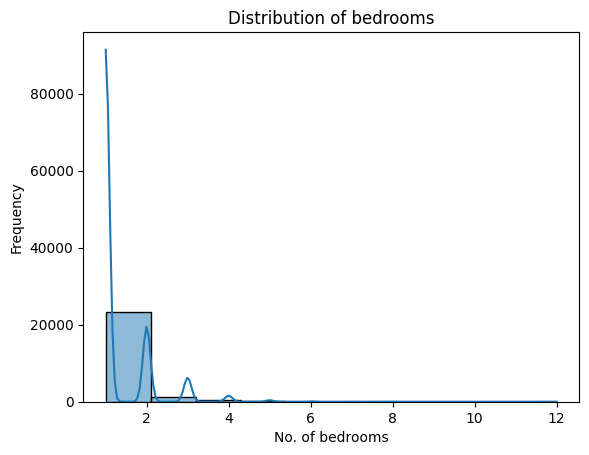

In [6]:
sns.histplot(df['bedrooms'], bins=10, kde=True)
plt.title('Distribution of bedrooms')
plt.xlabel('No. of bedrooms')
plt.ylabel('Frequency')
plt.show()

In [7]:
#skewed distribution so we use median rather than mean
df_cleaned['beds'].fillna(df['beds'].median(), inplace=True)

In [8]:
df_cleaned['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)

In [9]:
df_cleaned.isnull().sum()

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                        

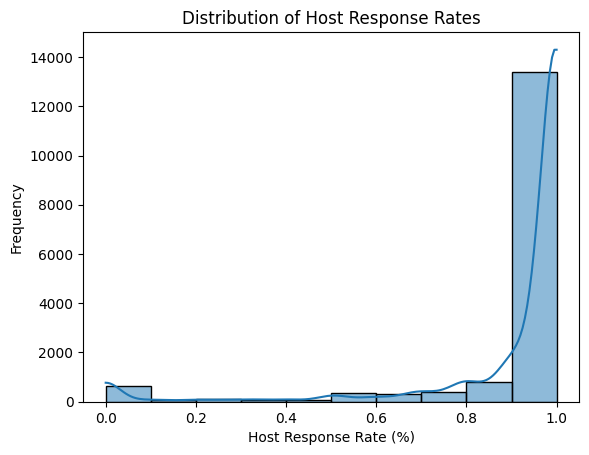

In [10]:
sns.histplot(df['host_response_rate'], bins=10, kde=True)
plt.title('Distribution of Host Response Rates')
plt.xlabel('Host Response Rate (%)')
plt.ylabel('Frequency')
plt.show()

In [11]:
df_cleaned['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)

In [12]:
df_cleaned.isnull().sum()

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                                  0
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                        

In [13]:
features_and_label_list =['price', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms','beds', 'bedrooms', 'amenities', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location', 'instant_bookable', 'host_total_listings_count', 'number_of_reviews', 'review_scores_value']

In [14]:
#I expect beds and bedrooms to have a correlation, which means to remove collinearity problem we have to remove one. 

correlation = df['beds'].corr(df['bedrooms'])
print(correlation)

#not as high as I expected, so I'll keep both variables for now

0.7571906442804026


In [15]:
df_processed = df_cleaned[features_and_label_list]

In [16]:
df_processed.dtypes

price                           float64
host_is_superhost                  bool
host_has_profile_pic               bool
host_identity_verified             bool
neighbourhood_group_cleansed     object
room_type                        object
accommodates                      int64
bathrooms                       float64
beds                            float64
bedrooms                        float64
amenities                        object
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
instant_bookable                   bool
host_total_listings_count       float64
number_of_reviews                 int64
review_scores_value             float64
dtype: object

In [17]:
df['amenities']

0        ["Extra pillows and blankets", "Baking sheet",...
1        ["Extra pillows and blankets", "Luggage dropof...
2        ["Kitchen", "BBQ grill", "Cable TV", "Carbon m...
3        ["Room-darkening shades", "Lock on bedroom doo...
4        ["Breakfast", "Carbon monoxide alarm", "Fire e...
                               ...                        
28017    ["Lock on bedroom door", "Hot water kettle", "...
28018    ["Kitchen", "Carbon monoxide alarm", "TV", "Wa...
28019    ["Hangers", "Keypad", "Kitchen", "Carbon monox...
28020    ["Luggage dropoff allowed", "Security cameras ...
28021    ["Air conditioning", "Hair dryer", "Fire extin...
Name: amenities, Length: 28022, dtype: object

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [19]:
df_processed['amenities'] = df_processed['amenities'].apply(ast.literal_eval)
mlb = MultiLabelBinarizer()
amenities_encoded = mlb.fit_transform(df_processed['amenities'])

amenities_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_)

print(amenities_df.columns)

/tmp/ipykernel_1556/2793991531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['amenities'] = df_processed['amenities'].apply(ast.literal_eval)


Index([' Bose Speaker Bluetooth sound system', ' Bosh refrigerator',
       ' Harman Kardon Bluetooth sound system',
       ' Renpure Originals Coconut Cream Nourishing Shampoo shampoo',
       ' THERE IS A CELLING FAN AN A PORTABLE AC IN THE BEDROOM conditioner',
       '10.1 cu. ft. Top Freezer Refrigerator refrigerator', '100" HDTV',
       '110" HDTV with Amazon Prime Video, Apple TV, Netflix', '120" HDTV',
       '120" HDTV with Amazon Prime Video, Apple TV, HBO Max, Netflix, premium cable',
       ...
       'varity body soap', 'vo5 body soap', 'vo5 conditioner', 'vo5 shampoo',
       'whatever is available body soap', 'whirlpool  oven',
       'whirlpool refrigerator', 'whirlpool stainless steel gas stove',
       'whirlpool stainless steel oven', 'x body soap'],
      dtype='object', length=2775)


In [20]:
amenity_counts = amenities_df.sum().sort_values(ascending=False)

top_7_amenities = amenity_counts.head(7).index

print(top_7_amenities)

Index(['Wifi', 'Essentials', 'Long term stays allowed', 'Smoke alarm',
       'Heating', 'Kitchen', 'Air conditioning'],
      dtype='object')


In [21]:
amenities_top_7 = amenities_df[top_7_amenities]

In [22]:
amenities_top_7

,Wifi,Essentials,Long term stays allowed,Smoke alarm,Heating,Kitchen,Air conditioning
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1
2,1,0,1,1,1,1,1
3,1,1,0,1,1,0,1
4,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...
28017,1,1,1,1,1,1,1
28018,1,0,0,1,0,1,1
28019,1,1,0,1,0,1,1
28020,1,1,1,1,1,1,1


In [23]:
df_processed = pd.concat([df_processed.drop(columns=['amenities']), amenities_top_7], axis=1)

In [24]:
df_processed.dtypes

price                           float64
host_is_superhost                  bool
host_has_profile_pic               bool
host_identity_verified             bool
neighbourhood_group_cleansed     object
room_type                        object
accommodates                      int64
bathrooms                       float64
beds                            float64
bedrooms                        float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
instant_bookable                   bool
host_total_listings_count       float64
number_of_reviews                 int64
review_scores_value             float64
Wifi                              int64
Essentials                        int64
Long term stays allowed           int64
Smoke alarm                       int64
Heating                           int64
Kitchen                           int64
Air conditioning                  int64


In [25]:
df_processed.isnull().sum()

price                           0
host_is_superhost               0
host_has_profile_pic            0
host_identity_verified          0
neighbourhood_group_cleansed    0
room_type                       0
accommodates                    0
bathrooms                       0
beds                            0
bedrooms                        0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
instant_bookable                0
host_total_listings_count       0
number_of_reviews               0
review_scores_value             0
Wifi                            0
Essentials                      0
Long term stays allowed         0
Smoke alarm                     0
Heating                         0
Kitchen                         0
Air conditioning                0
dtype: int64

In [26]:
#room_type, neighbourhood_group_cleansed need to be one-hot encoded
#instant_bookable, host_is_superhost, host_has profile_pic, host_identify_verified needs to be transformed

df_encoded = pd.get_dummies(df_processed, columns=['room_type', 'neighbourhood_group_cleansed'])

In [27]:
df_encoded.head()

,price,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,beds,bedrooms,review_scores_cleanliness,review_scores_checkin,...,Air conditioning,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
0,150.0,True,True,True,1,1.0,1.0,1.0,4.62,4.76,...,1,1,0,0,0,0,0,1,0,0
1,75.0,True,True,True,3,1.0,3.0,1.0,4.49,4.78,...,1,1,0,0,0,0,1,0,0,0
2,275.0,True,True,True,4,1.5,2.0,2.0,5.00,5.00,...,1,1,0,0,0,0,1,0,0,0
3,68.0,True,True,True,2,1.0,1.0,1.0,3.73,4.66,...,1,0,0,1,0,0,0,1,0,0
4,75.0,True,True,True,1,1.0,1.0,1.0,4.82,4.97,...,1,0,0,1,0,0,0,1,0,0


In [28]:
df_encoded['instant_bookable'] = df_encoded['instant_bookable'].astype(float)
df_encoded['host_is_superhost'] = df_encoded['host_is_superhost'].astype(float)
df_encoded['host_has_profile_pic'] = df_encoded['host_has_profile_pic'].astype(float)
df_encoded['host_identity_verified'] = df_encoded['host_identity_verified'].astype(float)

In [29]:
df_encoded.head()

,price,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,beds,bedrooms,review_scores_cleanliness,review_scores_checkin,...,Air conditioning,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
0,150.0,1.0,1.0,1.0,1,1.0,1.0,1.0,4.62,4.76,...,1,1,0,0,0,0,0,1,0,0
1,75.0,1.0,1.0,1.0,3,1.0,3.0,1.0,4.49,4.78,...,1,1,0,0,0,0,1,0,0,0
2,275.0,1.0,1.0,1.0,4,1.5,2.0,2.0,5.00,5.00,...,1,1,0,0,0,0,1,0,0,0
3,68.0,1.0,1.0,1.0,2,1.0,1.0,1.0,3.73,4.66,...,1,0,0,1,0,0,0,1,0,0
4,75.0,1.0,1.0,1.0,1,1.0,1.0,1.0,4.82,4.97,...,1,0,0,1,0,0,0,1,0,0


In [30]:
review_scores_corr = df_encoded.corr()['review_scores_value']

print("Correlation Matrix:")
print(review_scores_corr)


Correlation Matrix:
price                                        -0.004761
host_is_superhost                                  NaN
host_has_profile_pic                               NaN
host_identity_verified                             NaN
accommodates                                 -0.008672
bathrooms                                    -0.006047
beds                                         -0.004302
bedrooms                                      0.006785
review_scores_cleanliness                     0.687473
review_scores_checkin                         0.644369
review_scores_communication                   0.683776
review_scores_location                        0.595552
instant_bookable                             -0.046112
host_total_listings_count                    -0.074282
number_of_reviews                             0.081964
review_scores_value                           1.000000
Wifi                                          0.031469
Essentials                                   

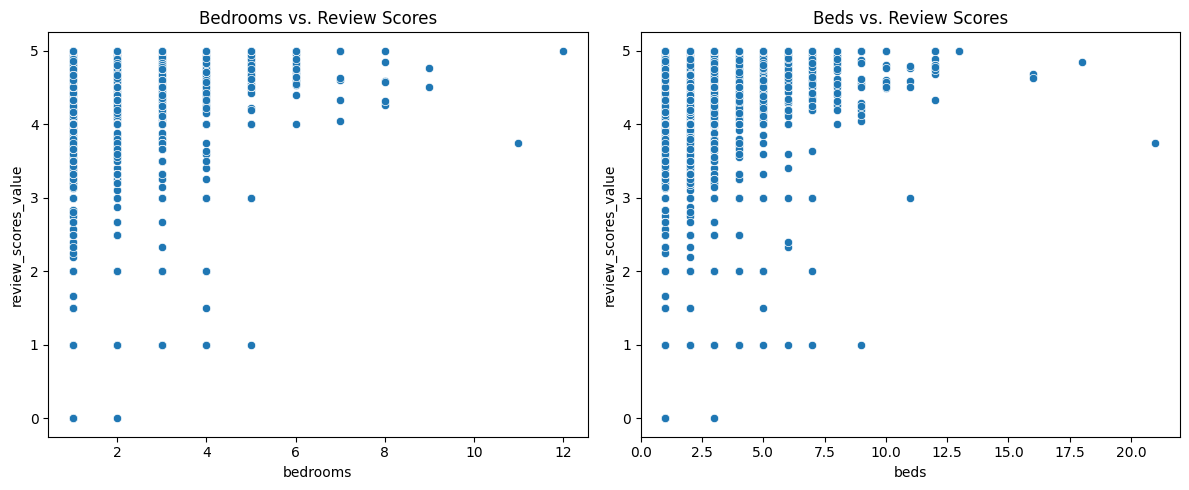

In [31]:
#Surprisingly, beds and bedrooms are not good indicators of Airbnb prices. 
#There is not enough data for higher number of bedrooms and though it appears that more bedrooms lead to 
#higher review score, maybe if we have more data the distribution could have been more like an Airbnb with only 1 bedroom.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df_encoded['bedrooms'], y=df_encoded['review_scores_value'])
plt.title('Bedrooms vs. Review Scores')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_encoded['beds'], y=df_encoded['review_scores_value'])
plt.title('Beds vs. Review Scores')

plt.tight_layout()
plt.show()

In [32]:
df_encoded.shape

(28022, 32)

In [33]:
df_encoded.dtypes

price                                         float64
host_is_superhost                             float64
host_has_profile_pic                          float64
host_identity_verified                        float64
accommodates                                    int64
bathrooms                                     float64
beds                                          float64
bedrooms                                      float64
review_scores_cleanliness                     float64
review_scores_checkin                         float64
review_scores_communication                   float64
review_scores_location                        float64
instant_bookable                              float64
host_total_listings_count                     float64
number_of_reviews                               int64
review_scores_value                           float64
Wifi                                            int64
Essentials                                      int64
Long term stays allowed     

In [34]:
sorted_corr = review_scores_corr.sort_values(ascending=False)
print(sorted_corr)

review_scores_value                           1.000000
review_scores_cleanliness                     0.687473
review_scores_communication                   0.683776
review_scores_checkin                         0.644369
review_scores_location                        0.595552
Essentials                                    0.106315
number_of_reviews                             0.081964
neighbourhood_group_cleansed_Brooklyn         0.064491
Smoke alarm                                   0.050432
room_type_Entire home/apt                     0.044653
Wifi                                          0.031469
Kitchen                                       0.026607
Air conditioning                              0.021618
neighbourhood_group_cleansed_Staten Island    0.020209
bedrooms                                      0.006785
neighbourhood_group_cleansed_Bronx            0.003107
beds                                         -0.004302
price                                        -0.004761
bathrooms 

In [35]:
features_list = ['review_scores_cleanliness','review_scores_communication', 'review_scores_checkin', 'review_scores_location', 'Essentials','number_of_reviews', 'neighbourhood_group_cleansed_Brooklyn', 'neighbourhood_group_cleansed_Staten Island','neighbourhood_group_cleansed_Queens', 'neighbourhood_group_cleansed_Manhattan', 'Smoke alarm', 'instant_bookable','host_total_listings_count', 'host_is_superhost' ,'host_has_profile_pic','host_identity_verified', 'review_scores_value']

In [36]:
df_encoded

,price,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,beds,bedrooms,review_scores_cleanliness,review_scores_checkin,...,Air conditioning,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
0,150.0,1.0,1.0,1.0,1,1.0,1.0,1.0,4.62,4.76,...,1,1,0,0,0,0,0,1,0,0
1,75.0,1.0,1.0,1.0,3,1.0,3.0,1.0,4.49,4.78,...,1,1,0,0,0,0,1,0,0,0
2,275.0,1.0,1.0,1.0,4,1.5,2.0,2.0,5.00,5.00,...,1,1,0,0,0,0,1,0,0,0
3,68.0,1.0,1.0,1.0,2,1.0,1.0,1.0,3.73,4.66,...,1,0,0,1,0,0,0,1,0,0
4,75.0,1.0,1.0,1.0,1,1.0,1.0,1.0,4.82,4.97,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,89.0,1.0,1.0,1.0,2,1.0,1.0,1.0,5.00,5.00,...,1,0,0,1,0,0,0,0,1,0
28018,1000.0,1.0,1.0,1.0,6,1.0,2.0,2.0,5.00,5.00,...,1,1,0,0,0,0,1,0,0,0
28019,64.0,1.0,1.0,1.0,2,2.0,1.0,1.0,1.00,1.00,...,1,0,0,1,0,0,1,0,0,0
28020,84.0,1.0,1.0,1.0,3,1.0,2.0,1.0,5.00,5.00,...,1,1,0,0,0,0,1,0,0,0


In [37]:
df_processed_w_features = df_encoded[features_list]
df_processed_w_features.head()

,review_scores_cleanliness,review_scores_communication,review_scores_checkin,review_scores_location,Essentials,number_of_reviews,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Staten Island,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Manhattan,Smoke alarm,instant_bookable,host_total_listings_count,host_is_superhost,host_has_profile_pic,host_identity_verified,review_scores_value
0,4.62,4.79,4.76,4.86,1,48,0,0,0,1,1,0.0,8.0,1.0,1.0,1.0,4.41
1,4.49,4.80,4.78,4.71,1,409,1,0,0,0,1,0.0,1.0,1.0,1.0,1.0,4.64
2,5.00,5.00,5.00,4.50,0,2,1,0,0,0,1,0.0,1.0,1.0,1.0,1.0,5.00
3,3.73,4.42,4.66,4.87,1,507,0,0,0,1,1,0.0,1.0,1.0,1.0,1.0,4.36
4,4.82,4.95,4.97,4.94,1,118,0,0,0,1,1,0.0,1.0,1.0,1.0,1.0,4.92


In [38]:
#I might want to scale as well when I finally train the model. 
#I want to start by using Linear Regression and if the results are not satisfactory (r2_squared value <0.75 on test data and/or mean_squared_error > 0.1), 
#I might try using other models. I'm thinking of Decision Trees, Random Forest, and Stacking 

In [39]:
df_processed_w_features.columns

Index(['review_scores_cleanliness', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_location', 'Essentials',
       'number_of_reviews', 'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Staten Island',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Manhattan', 'Smoke alarm',
       'instant_bookable', 'host_total_listings_count', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'review_scores_value'],
      dtype='object')

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I do have a new feature list. I first did a bit of feature-engineering. I transformed some columns like neighbourhood_group_cleansed using one-hot encoding so I can feed it into the model. I also changed boolean values into float values so that I can train the model easier. I then used a correlation matrix to identify which variables contributed the most to the value of the review scores (value for money). I picked the top 7 postive correlations with review score and then the top 3 negative correlations with review score (basically anything having an absolute correlation value of at least 0.5). I also did a bit of NLP work on 'amenities' were I separated the list of different amenities into labels of amenities where the presence or absence of amenities is represented by 1 or 0 under the column containing the name of the amenity. My new feature list is 'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_location', 'Essentials',
       'number_of_reviews', 'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Staten Island',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Manhattan', 'Smoke alarm',
       'instant_bookable', 'host_total_listings_count', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'review_scores_value'. The original dataset had 25 columns, compared to mine which has 17 including the label, review_scores_value. After one-hot encoding, a lot of new variables were formed (e.g.  'neighbourhood_group_cleansed_Staten Island',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Manhattan'). I also liked how I separated the list of amenities for each Airbnb into different columns containing the names of the amenities. 'Essentials' is one such column that proved to play a relatively bigger role in determining review_score_value, but we would not have known if we had not done NLP work on amenities
2. I transformed some columns like neighbourhood_group_cleansed using one-hot encoding so I can feed it into the model. I also changed boolean values into float values so that I can train the model easier. I also did a bit of NLP work on 'amenities' were I separated the list of different amenities into labels of amenities where the presence or absence of amenities is represented by 1 or 0 under the column containing the name of the amenity. I also changed null values to median values of the column. I chose to do median instead of mean because the distribution of the columns appeared to be skewed so median would have been a better fit than mean.
3. I am planning to start with Linear Regression, then move onto Decision Tree, then Gradient-Boosted Decision Tree, then Stacking and finally, Random Forest.
4. I am going to train all the models mentioned above. For decision tree, I am going to do a grid search, with my parameter grids containing values 4 and 8 for max_dept and 25 and 50 minimum sampels per leaf. Then, I will pick the best decision tree model. Afterwards, I will stack decision tree and linear regression together. I will aslo try doing Random Forest. My metric for analyzing the performance of the models would be using the value of the mean squared error and r-squared value. Ideally, I would want the model to have an r-squared value of 0.7 or more and the mean squared value to be 0.2 or less. The model that matches these metrics the closest will be the model. I will also be calcualting these metrics on testing data, not training data, since I want the model to generalize well on new data. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [84]:
# YOUR CODE HERE
X= df_processed_w_features.drop(columns='review_scores_value')
y= df_processed_w_features['review_scores_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
scaler = StandardScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_y_pred = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2_score = r2_score(y_test, lr_y_pred)
print(f'Mean Squared Error: {lr_mse:}')
print(f'R-squared: {lr_r2_score:}')

Mean Squared Error: 0.09786342350131506
R-squared: 0.6406448933045159


In [88]:
#Decision Tree
param_grid = { 'max_depth' : [4,8], 'min_samples_leaf' : [25,50]}

print('Running Grid Search...')


dt_regressor = DecisionTreeRegressor()

dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring = 'neg_root_mean_squared_error')


dt_grid_search = dt_grid.fit(X_train_scaled, y_train) 

print('Done')

Running Grid Search...
Done


In [89]:
dt_best_params = dt_grid_search.best_params_ 
dt_best_params

{'max_depth': 8, 'min_samples_leaf': 25}

In [90]:
dt_model = DecisionTreeRegressor(max_depth = 8, min_samples_leaf=25)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2_score = r2_score(y_test, dt_y_pred)
print(f'Mean Squared Error: {dt_mse:}')
print(f'R-squared: {dt_r2_score:}')

Mean Squared Error: 0.10870515385849686
R-squared: 0.6008339912342815


In [91]:
#Stacking
from sklearn.ensemble import StackingRegressor

In [92]:
estimators = [("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)),
              ("LR", LinearRegression())
             ]

In [93]:
stacking_model = StackingRegressor(estimators=estimators, passthrough=False)
stacking_model.fit(X_train_scaled, y_train)

StackingRegressor(estimators=[('DT',
                               DecisionTreeRegressor(max_depth=8,
                                                     min_samples_leaf=25)),
                              ('LR', LinearRegression())])

In [106]:
stacking_y_pred = stacking_model.predict(X_test_scaled)

stack_mse = mean_squared_error(y_test, stacking_y_pred, squared=False)

stack_r2 = r2_score(y_test, stacking_y_pred)
   
print('Mean Squared Error: ',stack_mse)
print('R2:', stack_r2)                

Mean Squared Error:  0.3121250701081814
R2: 0.6422655850974789


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [107]:
#Gradient-boosted decision trees
from sklearn.ensemble import GradientBoostingRegressor

gdbt_model = GradientBoostingRegressor(max_depth=2, n_estimators= 300)
gdbt_model.fit(X_train_scaled, y_train)


GradientBoostingRegressor(max_depth=2, n_estimators=300)

In [108]:
y_gbdt_pred = gdbt_model.predict(X_test_scaled)


gbdt_mse = mean_squared_error(y_test, y_gbdt_pred, squared=False)

gbdt_r2 = r2_score(y_test, y_gbdt_pred)


print('[GBDT] Mean Squared Error: ',(gbdt_mse))
print('[GBDT] R2: ', (gbdt_r2))    

[GBDT] Mean Squared Error:  0.3103441926988655
[GBDT] R2:  0.6463361562681528


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [109]:
#Last try, random forest :)

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf_model = RandomForestRegressor(max_depth=32, n_estimators = 300)
rf_model.fit(X_train_scaled, y_train)


y_rf_pred = rf_model.predict(X_test_scaled)


rf_mse = mean_squared_error(y_test, y_rf_pred, squared=False)


rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Mean Squared Error: {0}'.format(rf_mse))
print('[RF] R2: {0}'.format(rf_r2))  

[RF] Mean Squared Error: 0.33124465427065364
[RF] R2: 0.5970963767507522


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [112]:
print('Results presented in a table:\n')

dict = {'model':['Linear Regression', 'Decision Tree', 'Stacking','Graident-Boosted DT','Random Forest'],
        'mean squared error': [lr_mse, dt_mse, stack_mse, gbdt_rmse, rf_mse],
        'r2 score':[lr_r2_score, dt_r2_score, stack_r2, gbdt_r2, rf_r2]}

df_results = pd.DataFrame(dict)
df_results

Results presented in a table:



,model,mean squared error,r2 score
0,Linear Regression,0.097863,0.640645
1,Decision Tree,0.108705,0.600834
2,Stacking,0.312125,0.642266
3,Graident-Boosted DT,0.311559,0.646336
4,Random Forest,0.331245,0.597096


According to the table I created above, linear regression not only has the lowest mean squared error (which also meets the "ideal" criteria I wanted), but it also has a very high r2 score. Though stacking and gradient-boosted decision trees have a slightly larger r2 score, their mean squared error is much higher than the linear regression, so I would rather pick linear regression as the model. So our final model is =>

In [113]:
best_model = lr_model